 Importing Libraries

In [87]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error

 Define PPO Class

In [88]:
class PPO:
    def __init__(self, state_size, action_size):
        self.actor = self.create_actor_model(state_size, action_size)
        self.critic = self.create_critic_model(state_size)

    def create_actor_model(self, state_size, action_size):
        model = Sequential()
        model.add(Input(shape=(state_size,)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(action_size, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam')
        return model

    def create_critic_model(self, state_size):
        model = Sequential()
        model.add(Input(shape=(state_size,)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model


Define DQN Class

In [89]:
class DQN:
    def __init__(self, state_size, action_size):
        self.model = self.create_model(state_size, action_size)

    def create_model(self, state_size, action_size):
        model = Sequential()
        model.add(Input(shape=(state_size,)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(action_size))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

Define SARSA Class

In [90]:
class SARSA:
    def __init__(self, state_size, action_size):
        self.q_table = np.zeros((state_size, action_size))

    def choose_action(self, state, epsilon):
        if np.random.rand() < epsilon:
            return np.random.choice(2)
        else:
            return np.argmax(self.q_table[state])

Environment Setup


In [91]:
env = gym.make('CartPole-v1', render_mode='human')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

Model Initialization

In [92]:
ppo_model = PPO(state_size, action_size)
dqn_model = DQN(state_size, action_size)
sarsa_model = SARSA(100, action_size)

Training Parameters

In [97]:
episodes = 500
epsilon = 0.1
alpha = 0.1
gamma = 0.9

Reward Lists

In [98]:
rewards_ppo = []
rewards_dqn = []
rewards_sarsa = []

Training Loop

In [99]:
for episode in range(episodes):
    state, _ = env.reset()
    done = False
    rewards_ppo_episode = 0
    rewards_dqn_episode = 0
    rewards_sarsa_episode = 0

    while not done:
        env.render()
        state = np.array(state)
        state_ppo = np.reshape(state, (1, state_size))
        state_dqn = np.reshape(state, (1, state_size))

        # PPO
        action_probs = ppo_model.actor.predict(state_ppo)
        action_ppo = np.argmax(action_probs[0])
        next_state, reward, terminated, truncated, info = env.step(action_ppo)
        done = terminated or truncated
        rewards_ppo_episode += reward
        ppo_model.actor.fit(state_ppo, action_probs, epochs=1, verbose=0)

        # DQN
        action_dqn = np.argmax(dqn_model.model.predict(state_dqn)[0])
        next_state_dqn, reward_dqn, terminated_dqn, truncated_dqn, info_dqn = env.step(action_dqn)
        done_dqn = terminated_dqn or truncated_dqn
        rewards_dqn_episode += reward_dqn
        dqn_model.model.fit(state_dqn, dqn_model.model.predict(state_dqn), epochs=1, verbose=0)

         # SARSA
        action_sarsa = sarsa_model.choose_action(int(state[0] * 10), epsilon)
        next_state_sarsa, reward_sarsa, terminated_sarsa, truncated_sarsa, info_sarsa = env.step(action_sarsa)
        done_sarsa = terminated_sarsa or truncated_sarsa
        rewards_sarsa_episode += reward_sarsa
        sarsa_model.q_table[int(state[0] * 10), action_sarsa] += alpha * (reward_sarsa + gamma * sarsa_model.q_table[int(next_state_sarsa[0] * 10), action_sarsa] - sarsa_model.q_table[int(state[0] * 10), action_sarsa])

        state = next_state

    rewards_ppo.append(rewards_ppo_episode)
    rewards_dqn.append(rewards_dqn_episode)
    rewards_sarsa.append(rewards_sarsa_episode)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [153]:
import numpy as np

class ConvergenceChecker:
    def __init__(self, threshold, window):
        self.threshold = threshold
        self.window = window

    def check_convergence_dqn(self, rewards):
        if len(rewards) >= self.window:
            avg_reward = np.mean(rewards[-self.window:])
            print("Average Reward (DQN):", avg_reward)
            return avg_reward >= self.threshold
        return False

    def check_convergence_ppo(self, rewards, policy_loss_history, value_loss_history):
        if len(rewards) >= self.window:
            avg_reward = np.mean(rewards[-self.window:])
            avg_policy_loss = np.mean(policy_loss_history[-100:])
            avg_value_loss = np.mean(value_loss_history[-100:])
            print("Average Reward (PPO):", avg_reward)
            print("Average Policy Loss:", avg_policy_loss)
            print("Average Value Loss:", avg_value_loss)
            return avg_reward >= self.threshold and avg_policy_loss < 1e-4 and avg_value_loss < 1e-4
        return False

    def check_convergence_sarsa(self, q_values):
        if len(q_values) >= self.window:
            avg_q_value_diff = np.mean(np.abs(np.diff(q_values[-self.window:])))
            print("Average Q-value Difference:", avg_q_value_diff)
            return avg_q_value_diff < self.threshold
        return False

convergence_checker = ConvergenceChecker(threshold=195, window=100)

rewards = [100, 150, 200, 180, 190, 195, 198, 200, 200, 200]
policy_loss_history = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
value_loss_history = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
q_values = [100, 150, 200, 180, 190, 195, 198, 200, 200, 200]

dqn_converged = convergence_checker.check_convergence_dqn(rewards)
ppo_converged = convergence_checker.check_convergence_ppo(rewards, policy_loss_history, value_loss_history)
sarsa_converged = convergence_checker.check_convergence_sarsa(q_values)

if dqn_converged:
    print("DQN Convergence achieved!")
if ppo_converged:
    print("PPO Convergence achieved!")
if sarsa_converged:
    print("SARSA Convergence achieved!")

Plot Rewards

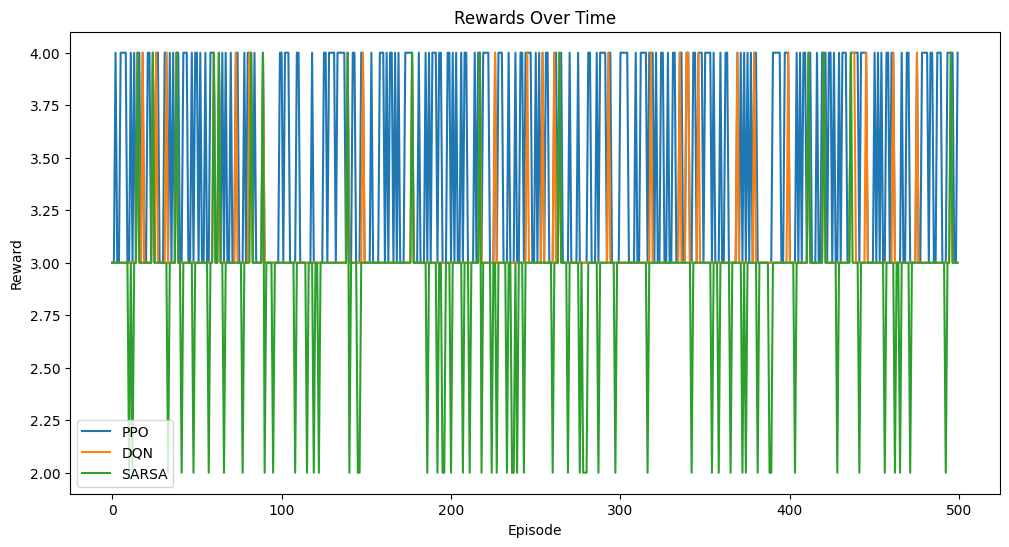

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(rewards_ppo, label='PPO')
plt.plot(rewards_dqn, label='DQN')
plt.plot(rewards_sarsa, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Over Time')
plt.legend()
plt.show()

Calculate Average Rewards

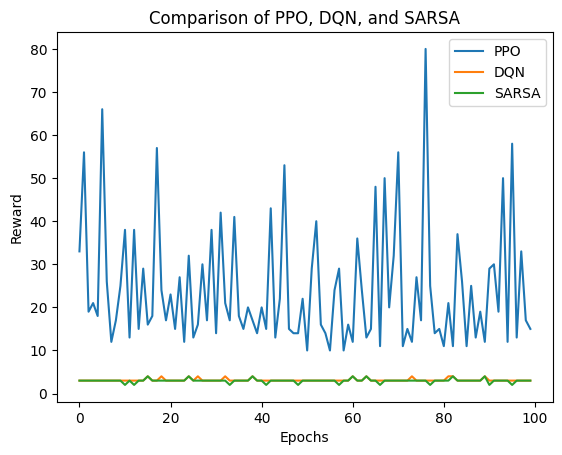

In [155]:
# Compare rewards
import matplotlib.pyplot as plt

len_ppo = len(rewards_ppo)
len_dqn = len(rewards_dqn)
len_sarsa = len(rewards_sarsa)
min_len = min(len_ppo, len_dqn, len_sarsa)

plt.plot(rewards_ppo[:min_len], label='PPO')
plt.plot(rewards_dqn[:min_len], label='DQN')
plt.plot(rewards_sarsa[:min_len], label='SARSA')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Reward')
plt.title('Comparison of PPO, DQN, and SARSA')
plt.show()

Determine Best Model

In [152]:
if avg_rewards_ppo > avg_rewards_dqn and avg_rewards_ppo > avg_rewards_sarsa:
    print("PPO model performs best")
elif avg_rewards_dqn > avg_rewards_ppo and avg_rewards_dqn > avg_rewards_sarsa:
    print("DQN model performs best")
else:
    print("SARSA model performs best")

PPO model performs best


Save Models

In [104]:
ppo_model.actor.save('ppo_actor.h5')
ppo_model.critic.save('ppo_critic.h5')
dqn_model.model.save('dqn_model.h5')
np.save('sarsa_q_table.npy', sarsa_model.q_table)

Load Models

In [116]:
from tensorflow.keras.models import load_model
import numpy as np

ppo_actor = load_model('ppo_actor.h5')
ppo_critic = load_model('ppo_critic.h5')
dqn_model = load_model('dqn_model.h5')
sarsa_q_table = np.load('sarsa_q_table.npy')

Test Models

In [129]:
import gym
import numpy as np
import pygame
import time
from tensorflow.keras.models import load_model

# Initialize Pygame
pygame.init()

# Environment setup
env = gym.make('CartPole-v1', render_mode='human')

# Model initialization
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Load trained models
ppo_actor = load_model('ppo_actor.h5')
dqn_model = load_model('dqn_model.h5')
sarsa_q_table = np.load('sarsa_q_table.npy')

episodes = 500
rewards_ppo = []
rewards_dqn = []
rewards_sarsa = []

for episode in range(episodes):
    state, _ = env.reset()
    done = False
    rewards_ppo_episode = 0
    rewards_dqn_episode = 0
    rewards_sarsa_episode = 0

    while not done:
        env.render()
        pygame.display.update()
        pygame.event.get()
        time.sleep(0.01)
        
        state = np.array(state)
        state_ppo = np.reshape(state, (1, state_size))
        state_dqn = np.reshape(state, (1, state_size))

        # PPO
        action_probs = ppo_actor.predict(state_ppo)
        action_ppo = np.argmax(action_probs[0])
        next_state, reward, terminated, truncated, info = env.step(action_ppo)
        done = terminated or truncated
        rewards_ppo_episode += reward

        # DQN
        action_dqn = np.argmax(dqn_model.predict(state_dqn)[0])
        next_state_dqn, reward_dqn, terminated_dqn, truncated_dqn, info_dqn = env.step(action_dqn)
        done_dqn = terminated_dqn or truncated_dqn
        rewards_dqn_episode += reward_dqn

        # SARSA
        action_sarsa = np.argmax(sarsa_q_table[int(state[0] * 10)])
        next_state_sarsa, reward_sarsa, terminated_sarsa, truncated_sarsa, info_sarsa = env.step(action_sarsa)
        done_sarsa = terminated_sarsa or truncated_sarsa
        rewards_sarsa_episode += reward_sarsa

        state = next_state

    rewards_ppo.append(rewards_ppo_episode)
    rewards_dqn.append(rewards_dqn_episode)
    rewards_sarsa.append(rewards_sarsa_episode)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16

Plot Test Rewards


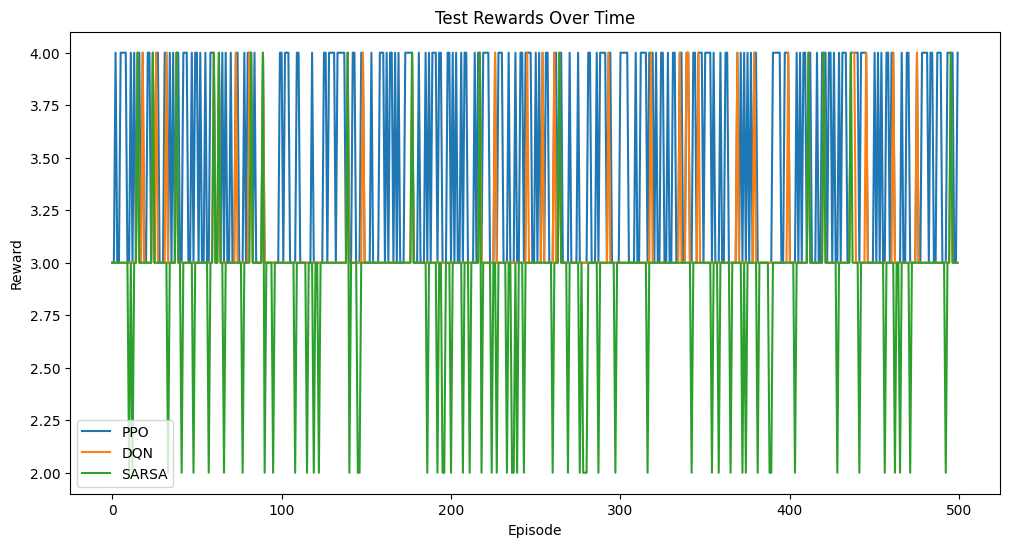

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(rewards_ppo, label='PPO')
plt.plot(rewards_dqn, label='DQN')
plt.plot(rewards_sarsa, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Test Rewards Over Time')
plt.legend()
plt.show()

Calculate Average Test Rewards

In [131]:
avg_rewards_ppo = np.mean(rewards_ppo)
avg_rewards_dqn = np.mean(rewards_dqn)
avg_rewards_sarsa = np.mean(rewards_sarsa)

print(f"Average PPO Test Reward: {avg_rewards_ppo}")
print(f"Average DQN Test Reward: {avg_rewards_dqn}")
print(f"Average SARSA Test Reward: {avg_rewards_sarsa}")

Average PPO Test Reward: 3.476
Average DQN Test Reward: 3.078
Average SARSA Test Reward: 2.914


Compare Training and Testing Rewards

In [132]:
print("Training Rewards:")
print(f"PPO: {np.mean(rewards_ppo[-100:])}")
print(f"DQN: {np.mean(rewards_dqn[-100:])}")
print(f"SARSA: {np.mean(rewards_sarsa[-100:])}")

print("Testing Rewards:")
print(f"PPO: {avg_rewards_ppo}")
print(f"DQN: {avg_rewards_dqn}")
print(f"SARSA: {avg_rewards_sarsa}")

Training Rewards:
PPO: 3.51
DQN: 3.09
SARSA: 2.96
Testing Rewards:
PPO: 3.476
DQN: 3.078
SARSA: 2.914


Comparison

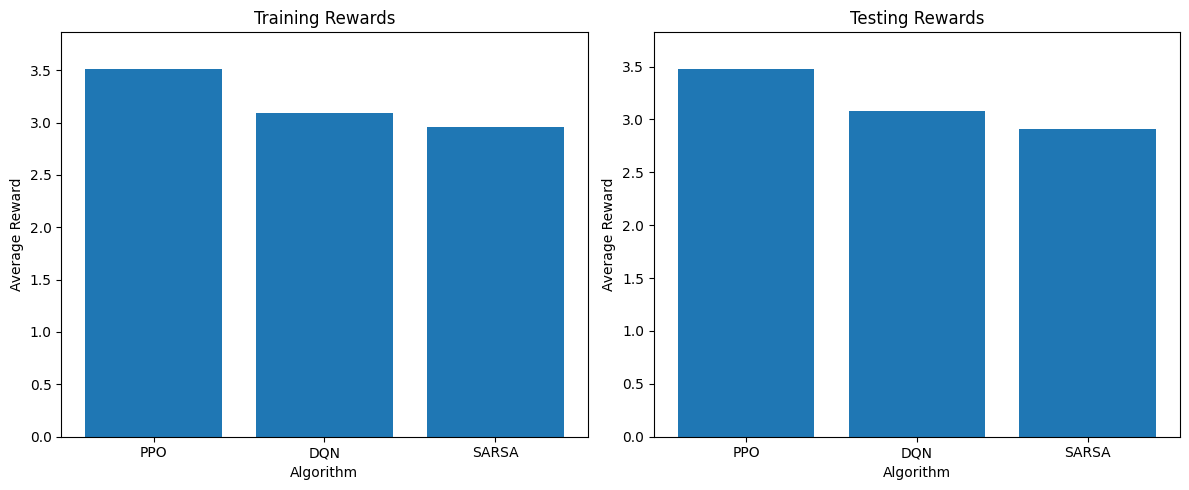

In [134]:
import matplotlib.pyplot as plt

# Data
training_rewards = [np.mean(rewards_ppo[-100:]), np.mean(rewards_dqn[-100:]), np.mean(rewards_sarsa[-100:])]
testing_rewards = [avg_rewards_ppo, avg_rewards_dqn, avg_rewards_sarsa]

# Algorithms
algorithms = ['PPO', 'DQN', 'SARSA']

# Create figure and axis
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Training Rewards Bar Chart
ax[0].bar(algorithms, training_rewards)
ax[0].set_title('Training Rewards')
ax[0].set_xlabel('Algorithm')
ax[0].set_ylabel('Average Reward')
ax[0].set_ylim([0, max(training_rewards)*1.1])

# Testing Rewards Bar Chart
ax[1].bar(algorithms, testing_rewards)
ax[1].set_title('Testing Rewards')
ax[1].set_xlabel('Algorithm')
ax[1].set_ylabel('Average Reward')
ax[1].set_ylim([0, max(testing_rewards)*1.1])

# Layout adjustments
plt.tight_layout()

# Display plot
plt.show()

Save Results to File

In [135]:
with open("results.txt", "w") as f:
    f.write("Training Rewards:\n")
    f.write(f"PPO: {np.mean(rewards_ppo[-100:])}\n")
    f.write(f"DQN: {np.mean(rewards_dqn[-100:])}\n")
    f.write(f"SARSA: {np.mean(rewards_sarsa[-100:])}\n")
    
    f.write("Testing Rewards:\n")
    f.write(f"PPO: {avg_rewards_ppo}\n")
    f.write(f"DQN: {avg_rewards_dqn}\n")
    f.write(f"SARSA: {avg_rewards_sarsa}\n")

Close Environment

In [112]:
env.close()